# Jupyter notebook to display the daylight hours by month:

The functions used here were taken from the blog post named "Is Seattle Really Seeing an Uptick In Cycling?".

Link: __[Is Seattle Really Seeing an Uptick In Cycling?](https://jakevdp.github.io/blog/2014/06/10/is-seattle-really-seeing-an-uptick-in-cycling/)__

In [50]:
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [51]:
# function which returns the hours of daylight
# given the day of the year, from 0 to 365
def hours_of_daylight(date, axis=23.44, latitude=47.61):
    """
    Compute the hours of daylight for the given date.
    
    :param date:     A pandas' date object.
    :param axis:     Earth's tilt.
    :param latitude: The latitude of the location for which to compute
                     the daylight hours.
                     
    :returns: TODO
    """
    diff = date - pd.datetime(2000, 12, 21)
    day = diff.total_seconds() / 24. / 3600
    day %= 365.25
    m = 1. - np.tan(np.radians(latitude)) * np.tan(np.radians(axis) * np.cos(day * np.pi / 182.625))
    m = max(0, min(m, 2))
    
    return 24. * np.degrees(np.arccos(1 - m)) / 180.

## Test the function:

Text(0,0.5,'Hours of daylight (Victoria)')

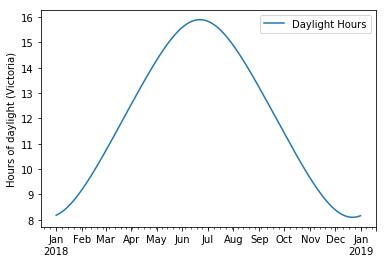

In [63]:
# Asuncion / CA / Paraguay = -25.2637˚
# Victoria / BC / Canada   = +48.4284˚
INDEX:int = 1

places = {
    "Asunción": -25.2637,
    "Victoria": +48.4284
}
start = datetime(year=2018, month=1, day=1)
days = start + pd.to_timedelta(np.arange(365), "D")

# debug:
# days

# iterate all days an compute the daylight hours
hours = pd.DataFrame(
    days.map(lambda day: hours_of_daylight(day, latitude=list(places.values())[INDEX])),
    columns=["Daylight Hours"],
    index=days
)

# debug:
# hours.head()

# plot
hours.plot()
plt.ylabel("Hours of daylight ({})".format(list(places.keys())[INDEX]))

# observation:
# to print in hours, minutes and seconds use: dt.timedelta(hours=hours_of_daylight())